In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

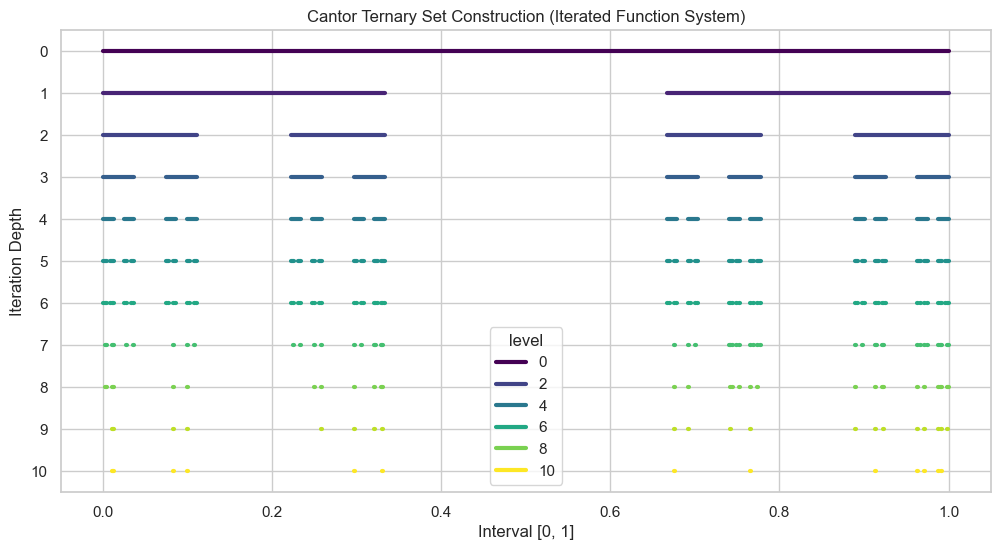

In [9]:
# 1. Define the two specific functions requested
def get_left_part(start, end):
    """
    Takes an interval and returns the left third.
    Mathematically: S1(x) = x/3
    """
    length = end - start
    return start, start + (length / 3)

def get_right_part(start, end):
    """
    Takes an interval and returns the right third.
    Mathematically: S2(x) = x/3 + 2/3
    """
    length = end - start
    return end - (length / 3), end

# 2. Generator to build the fractal levels
def generate_cantor_data(iterations):
    # We store segments as dictionaries to easily make a DataFrame later
    data = []

    # Initial state: One segment from 0 to 1 at level 0
    current_segments = [(0, 1)]

    # Add level 0 to data
    data.append({'level': 0, 'start': 0, 'end': 1, 'segment_id': '0-0'})

    for i in range(1, iterations + 1):
        next_segments = []
        for j, (start, end) in enumerate(current_segments):
            # Apply the Left Function
            l_start, l_end = get_left_part(start, end)
            next_segments.append((l_start, l_end))
            data.append({
                'level': i,
                'start': l_start,
                'end': l_end,
                'segment_id': f'{i}-{j}-L'
            })

            # Apply the Right Function
            r_start, r_end = get_right_part(start, end)
            next_segments.append((r_start, r_end))
            data.append({
                'level': i,
                'start': r_start,
                'end': r_end,
                'segment_id': f'{i}-{j}-R'
            })

        current_segments = next_segments

    return pd.DataFrame(data)

# 3. Visualization with Seaborn
def plot_cantor(df):
    # Set the Seaborn theme
    sns.set_theme(style="whitegrid")

    plt.figure(figsize=(12, 6))

    # Seaborn doesn't have a native "hlines" function, so we use lineplot
    # We must restructure data for lineplot: each segment needs two rows (start point, end point)
    plot_data = []
    for _, row in df.iterrows():
        # Point 1 (Start of line)
        plot_data.append({'level': row['level'], 'x': row['start'], 'group': row['segment_id']})
        # Point 2 (End of line)
        plot_data.append({'level': row['level'], 'x': row['end'],   'group': row['segment_id']})

    plot_df = pd.DataFrame(plot_data)

    # Plot using lineplot, grouping by unique segment IDs to draw disjoint lines
    ax = sns.lineplot(
        data=plot_df,
        x='x',
        y='level',
        hue='level',       # Color by depth
        units='group',     # Group by segment so they don't connect
        estimator=None,    # Draw raw lines, no aggregation
        palette="viridis",
        linewidth=3
    )

    # Formatting for clarity
    ax.invert_yaxis() # Put Level 0 at the top
    plt.title("Cantor Ternary Set Construction (Iterated Function System)")
    plt.xlabel("Interval [0, 1]")
    plt.ylabel("Iteration Depth")
    plt.yticks(df['level'].unique()) # Show integer ticks only
    plt.show()

# --- Execution ---
# Generate 6 levels of the Cantor set
df_cantor = generate_cantor_data(10)
plot_cantor(df_cantor)

In [10]:
def get_left_part(start, end):
    length = end - start
    return start, start + (length / 3)

def get_right_part(start, end):
    length = end - start
    return end - (length / 3), end

def analyze_cantor_set(iterations):
    # Start with the unit interval [0, 1]
    current_segments = [(0.0, 1.0)]

    print(f"{'Level':<6} | {'Remaining Length':<18} | {'Removed Length':<16} | {'Interval Count':<15}")
    print("-" * 65)

    for i in range(iterations + 1):
        # 1. Calculate Statistics for the current level
        total_len = sum(end - start for start, end in current_segments)
        removed_len = 1.0 - total_len
        count = len(current_segments)

        # 2. Print Stats
        # We use .5f to show precision as the numbers get small
        print(f"{i:<6} | {total_len:<18.5f} | {removed_len:<16.5f} | {count:<15}")

        # 3. Print the actual intervals (only for first 3 levels to avoid clutter)
        if i <= 3:
            formatted_intervals = [f"[{s:.4f}, {e:.4f}]" for s, e in current_segments]
            print(f"       > Intervals: {', '.join(formatted_intervals)}")
            print("-" * 65)
        elif i == 4:
            print("       > (Interval list hidden for readability due to high count...)")
            print("-" * 65)

        # 4. Generate next level segments
        next_segments = []
        for start, end in current_segments:
            next_segments.append(get_left_part(start, end))
            next_segments.append(get_right_part(start, end))

        current_segments = next_segments

# --- Run the Analysis ---
analyze_cantor_set(iterations=5)

Level  | Remaining Length   | Removed Length   | Interval Count 
-----------------------------------------------------------------
0      | 1.00000            | 0.00000          | 1              
       > Intervals: [0.0000, 1.0000]
-----------------------------------------------------------------
1      | 0.66667            | 0.33333          | 2              
       > Intervals: [0.0000, 0.3333], [0.6667, 1.0000]
-----------------------------------------------------------------
2      | 0.44444            | 0.55556          | 4              
       > Intervals: [0.0000, 0.1111], [0.2222, 0.3333], [0.6667, 0.7778], [0.8889, 1.0000]
-----------------------------------------------------------------
3      | 0.29630            | 0.70370          | 8              
       > Intervals: [0.0000, 0.0370], [0.0741, 0.1111], [0.2222, 0.2593], [0.2963, 0.3333], [0.6667, 0.7037], [0.7407, 0.7778], [0.8889, 0.9259], [0.9630, 1.0000]
-----------------------------------------------------------------

In [14]:
import time

def run_high_performance_cantor(iterations):
    # Start with one segment [0, 1]
    # To save memory, we don't need to store the actual coordinates for simple length calcs,
    # but since your code is about intervals, we will store them efficiently.
    current_segments = [(0.0, 1.0)]

    print(f"Generating {iterations} iterations...")
    start_time = time.time()

    for i in range(1, iterations + 1):
        next_segments = []

        # We assume standard 1/3 removal.
        # Length logic: New Length = Old Length / 3
        # We don't need to loop through 1 million items to know the total length.
        # We can calculate total length mathematically to avoid O(N) memory issues if we wanted,
        # BUT to respect your request to "generate lines":

        for start, end in current_segments:
            length = end - start
            segment_len = length / 3

            # Left part
            next_segments.append((start, start + segment_len))
            # Right part
            next_segments.append((end - segment_len, end))

        current_segments = next_segments

        # Status update every 5 levels so you know it's working
        if i % 5 == 0:
            print(f" > Level {i}: {len(current_segments):,} segments generated.")

    end_time = time.time()

    # Final Stats
    total_len = sum(end - start for start, end in current_segments)
    smallest_segment = current_segments[0][1] - current_segments[0][0]

    print("-" * 40)
    print(f"COMPLETED in {end_time - start_time:.4f} seconds")
    print(f"Total Segments: {len(current_segments):,}")
    print(f"Total Length:   {total_len:.10f}")
    print(f"Smallest Segment Size: {smallest_segment:.15f}")

# Run it
run_high_performance_cantor(25)

Generating 25 iterations...
 > Level 5: 32 segments generated.
 > Level 10: 1,024 segments generated.
 > Level 15: 32,768 segments generated.
 > Level 20: 1,048,576 segments generated.
 > Level 25: 33,554,432 segments generated.
----------------------------------------
COMPLETED in 12.2571 seconds
Total Segments: 33,554,432
Total Length:   0.0000396027
Smallest Segment Size: 0.000000000001180
